NAME - PROTIM GANGULY (SID - 18230445)
NAME - KOUSTAVA GOSWAMI (SID - 18234857)

In [0]:
# Contributor - PROTIM GANGULY
#This is the part where we have imported all the libraries that is needed for the logistic algorithm building and accuracy description
import csv 
import numpy as np
import pandas as pd
#Advanced optimization
from scipy import optimize as op
from sklearn.model_selection import train_test_split

In [2]:
# Contributor - KOUSTAVA GOSWAMI
#This section has been introduced to upload the file "owls.csv" in cache to read
from google.colab import files
uploaded = files.upload()

Saving owls.csv to owls (1).csv


In [0]:
# Contributor - KOUSTAVA GOSWAMI
#This section reads the file first. Then From the file it differentiate the features part which is X and the class part
#which is y. We have taken class always the last column of the input CSV. Any unlabelled CSV file can also be read
#and work on as we have generalised the features and class differentiate part. Till the last column all the columns
#will be taken as different features. We then hasve normalised the data based on the maximum and minimum value of the fe
#features and divind that with the range of feature data. Now there is a main work to do. As there is no feature for 
#the 0th theta, we are adding a bias term 1 as X(0) feature in the feature vector so that vector multiplication
#will work in future algorithm process

owls = pd.read_csv("owls.csv",header=None)
m = owls.shape[0]
#Features
n = (len(owls.columns)- 1)

X = np.ones((m,n ))
y = np.array((m,1))
for i in range(len(owls.columns)- 1):
  X[:,i] = owls.iloc[:,i]
y = owls.iloc[: , -1]
k = len(np.unique(y))#Number of classes
#Normalisation part
def normalize(X): 
    mins = np.min(X, axis = 0) 
    maxs = np.max(X, axis = 0) 
    rng = maxs - mins 
    norm_X = 1 - ((maxs - X)/rng) 
    return norm_X
X = normalize(X)
# Add bias dimension and transform into columns
X = np.hstack((np.matrix(np.ones(X.shape[0])).T, X))


In [0]:
#Contributor - KOUSTAVA GOSWAMI
#Function definition 
#Below are the function definitions which are being used in the Logistic Regression alogrithm and multiclass identification
#First function is sigmoid function which will be used for the hypothesis calculation
#Second function is the cost function. The cost function is the differnece between the orginal classified value 
#and the hypothesis that is determined. The hypothesis function is the multiplication of feature vector and theta
#and sigmoid value of the multiplication. We have implemented logistic regression cost formula.
#Next We have build the gradient function. We have implemented the gradient formula using hypothesis and sigmoid
#function. This gradient function will be used to get the optimised theta value in the gradient descent algorithm
#We have introduced a logisticRegression function where we have implemented the gradient descent algorithm. We have 
#taken alpha(learning rate =0.005) and multiplying it with the gradient value what we got in gradient function. This
#gave me the optimized theta.
#The logistic predictor function holds the probability of each classifer by multiplying the optimized theta and x-
#feature vector and sigmoid function of that multiplication. Then we take the maximum of these probabilities to get
#the classifier for that particular feature values.
#The score function is giving us the percentage of the accuracy when the predicted class and the original class is gettign
#matched.
def sigmoid(z):
    return 1.0 / (1 + np.exp(-z))

#Cost function
def costFunction(theta, X, y):
    m = len(y)
    h = sigmoid(X.dot(theta))
    return (1 / m) * (-y.T.dot(np.log(h)) - (1 - y).T.dot(np.log(1 - h))) 

#gradient function
def gradient(theta, X, y,):
    m, n = X.shape
    theta = theta.reshape((n, 1))
    y = y.reshape((m, 1))
    h = sigmoid(X.dot(theta))
    return ((1 / m) * X.T.dot(h - y))

#Optimal theta 
def logisticRegression(X, y, theta , alpha):
    for i in range(100000):
            finaGradient = gradient(theta,X,y)
            finaCost = costFunction (theta,X,y)
            theta -= alpha * finaGradient
    return theta.T

#Logistic Predictor
def logisticPredictor(x,all_theta,y):
    P = sigmoid(x.dot(all_theta.T)) #probability for each owl
    p = [np.unique(y)[np.argmax(P[i, :])] for i in range(x.shape[0])]
    return p

#Scoring Function
def score(p, y):
    return (sum(p == y)/ len(y))*100
    
    

In [0]:
# Contributor - PROTIM GANGULY
#First we have splitted the dataset with 70-30 Train Test split ratio. Initially we have considered theta as zero with learning rate alpha = 0.005.
#We call our classifier for all the class labels and then we predict our highest class probability with argmax. This procedure should be repeated 
#with different random divisions 10 times, and the individual results and accuracy reported.
from sklearn.model_selection import train_test_split
from itertools import product
b=[]
avergAccuracy=[]
sum_theta=np.zeros((k, n + 1))
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
    all_theta = np.zeros((k, n + 1))
    #print(all_theta.shape)
    alpha = 0.005
    #One vs all
    i = 0
    for o in np.unique(y):
        #set the labels in 0 and 1
        tmp_y = np.array(y_train == o, dtype = int)
        optTheta = logisticRegression(X_train, tmp_y, np.zeros((n + 1,1)), alpha)
        all_theta[i] = optTheta
        i += 1
        
    sum_theta += all_theta    
    
    #Predictions
    p = logisticPredictor(X_test,all_theta,y_test)
    
    accuracy = score(p,y_test)
    avergAccuracy.append(accuracy)
    print("The accuracy of the system is :",accuracy,"%")
    
    yTest = y_test
    yList = yTest.tolist()
    i=0
    l=len(p)
    a =[]
    while(i<l):
        out ="Actual ",yList[i]," Predicted ",p[i]
        a.append(out)
        i = i+1
    b.append(a)
print(sum_theta/10)

  

The accuracy of the system is : 90.2439024390244 %
The accuracy of the system is : 87.8048780487805 %
The accuracy of the system is : 87.8048780487805 %
The accuracy of the system is : 92.6829268292683 %
The accuracy of the system is : 85.36585365853658 %
The accuracy of the system is : 97.5609756097561 %
The accuracy of the system is : 97.5609756097561 %
The accuracy of the system is : 100.0 %
The accuracy of the system is : 95.1219512195122 %
The accuracy of the system is : 85.36585365853658 %
[[ 1.21214031 -4.98042095  0.01295993  1.9975092  -1.48283781]
 [ 2.30604221  4.58719832 -3.05233363 -6.1608834  -6.13159404]
 [-7.53609418 -2.84414092  1.15817951  4.82576002  7.58747752]]


In [0]:
#Contributor - KOUSTAVA GOSWAMI
#This part is writing the file using python file writing function. We are taking the predicted and original class values
#and printing the values of each iteration in the file whose name is :-"Prediction_Logistic_Output.txt"
with open('Prediction_Logistic_Output.txt', 'w') as f:#Please change the file writing location accroding to yur system
    for i in range(len(b)):
        for item in b:
            f.write("%s\n" % item) 

In [5]:
#Contributor - PROTIM GANGULY
# Average accuracy is computed and Confusion matrix and classification Report is generated. Here we have also shown the visualization of the
#data set.
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
def avgAccuracy():
    sum=0
    for i in range(len(avergAccuracy)):
      sum= sum + avergAccuracy[i]
    print("The average accuracy of the system after the iteration is : ",(sum/10),"%")
avgAccuracy()
print(confusion_matrix(yList, p))

target_names = ['BarnOwl', 'LongEaredOwl', 'SnowyOwl']
#To generate classification report
print(classification_report(yList, p, target_names=target_names))
label = pd.DataFrame(np.asarray(yList))
print(label[0].value_counts())

X_test_df = pd.DataFrame(np.asarray(X_test))
#Plot to visualize our dataset
sns.countplot(x = label[0], data = X_test_df, palette = 'hls')
plt.show()
#Variation of our attributes across the mean
owls.groupby(label[0]).mean()

NameError: ignored

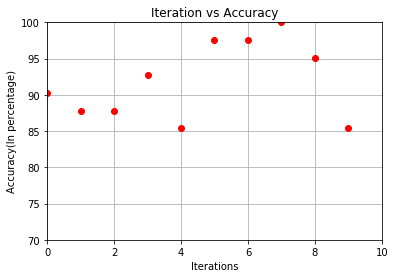

In [0]:
#Contributor - PROTIM GANGULY
#Graph for iteration vs accuracy to visualize the accuracy on randomn splits
import matplotlib.pyplot as plt
plt.plot([0,1,2,3,4,5,6,7,8,9], avergAccuracy, 'ro')
plt.axis([0, 10,70,100 ])
plt.xlabel('Iterations')
plt.ylabel('Accuracy(In percentage)')
plt.title('Iteration vs Accuracy')
plt.grid(True)
plt.show()